In [4]:
import sys
sys.path.append('..')
from utils import evaluate_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
flight_df = pd.read_csv("./data/Combined_Flights_2022.csv")
flight_df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


In [5]:
flight_target = flight_df["Cancelled"]
flight_features = flight_df.drop(columns=["Cancelled"])

flight_features = flight_features.dropna(axis=1, how="all")

flight_features = flight_features.dropna(axis=1, how="any")

flight_features = flight_features.dropna(axis=0, how="any")
flight_target = flight_target.loc[flight_features.index]

flight_features = flight_features.select_dtypes(include=["number"])

print("Final target distribution:")
print(flight_target.value_counts(dropna=False))

Final target distribution:
Cancelled
False    3955126
True      123192
Name: count, dtype: int64


In [6]:
sample_size = 200000  # smaller because data set is huge, models take too long

flight_features_sampled = flight_features.sample(n=sample_size, random_state=42)
flight_target_sampled = flight_target.loc[flight_features_sampled.index]

print("\nSampled features shape:", flight_features_sampled.shape)
print("Sampled target distribution:")
print(flight_target_sampled.value_counts(dropna=False))

flight_features_train, flight_features_test, flight_target_train, flight_target_test = train_test_split(
    flight_features_sampled,
    flight_target_sampled,
    test_size=0.3,
    random_state=42,
    stratify=flight_target_sampled
)


Sampled features shape: (200000, 25)
Sampled target distribution:
Cancelled
False    194064
True       5936
Name: count, dtype: int64


In [7]:
# Dictionary to store all flight results
flight_results = {}

flight_nb = GaussianNB()
acc, prec, rec, preds = evaluate_model(
    "Naive Bayes (Flights)",
    flight_nb,
    flight_features_train,
    flight_target_train,
    flight_features_test,
    flight_target_test
)
flight_results['Naive Bayes'] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'predictions': preds}

flight_lr = LogisticRegression(max_iter=2000)
acc, prec, rec, preds = evaluate_model(
    "Logistic Regression (Flights)",
    flight_lr,
    flight_features_train,
    flight_target_train,
    flight_features_test,
    flight_target_test
)
flight_results['Logistic Regression'] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'predictions': preds}

flight_knn = KNeighborsClassifier(n_neighbors=5)
acc, prec, rec, preds = evaluate_model(
    "KNN (Flights, k=5)",
    flight_knn,
    flight_features_train,
    flight_target_train,
    flight_features_test,
    flight_target_test
)
flight_results['KNN'] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'predictions': preds}

flight_dt = DecisionTreeClassifier(random_state=42)
acc, prec, rec, preds = evaluate_model(
    "Decision Tree (Flights)",
    flight_dt,
    flight_features_train,
    flight_target_train,
    flight_features_test,
    flight_target_test
)
flight_results['Decision Tree'] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'predictions': preds}

flight_mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)
acc, prec, rec, preds = evaluate_model(
    "MLP (Flights, 50 hidden units)",
    flight_mlp,
    flight_features_train,
    flight_target_train,
    flight_features_test,
    flight_target_test
)
flight_results['MLP'] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'predictions': preds}

--- Naive Bayes (Flights) ---
Accuracy : 0.9703
Precision: 0.9415
Recall   : 0.9703



c:\Users\aamgr\Documents\Kodeprosjekter\ds-project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression (Flights) ---
Accuracy : 0.9703
Precision: 0.9415
Recall   : 0.9703

--- KNN (Flights, k=5) ---
Accuracy : 0.9697
Precision: 0.9464
Recall   : 0.9697

--- Decision Tree (Flights) ---
Accuracy : 0.9458
Precision: 0.9517
Recall   : 0.9458

--- MLP (Flights, 50 hidden units) ---
Accuracy : 0.9703
Precision: 0.9415
Recall   : 0.9703



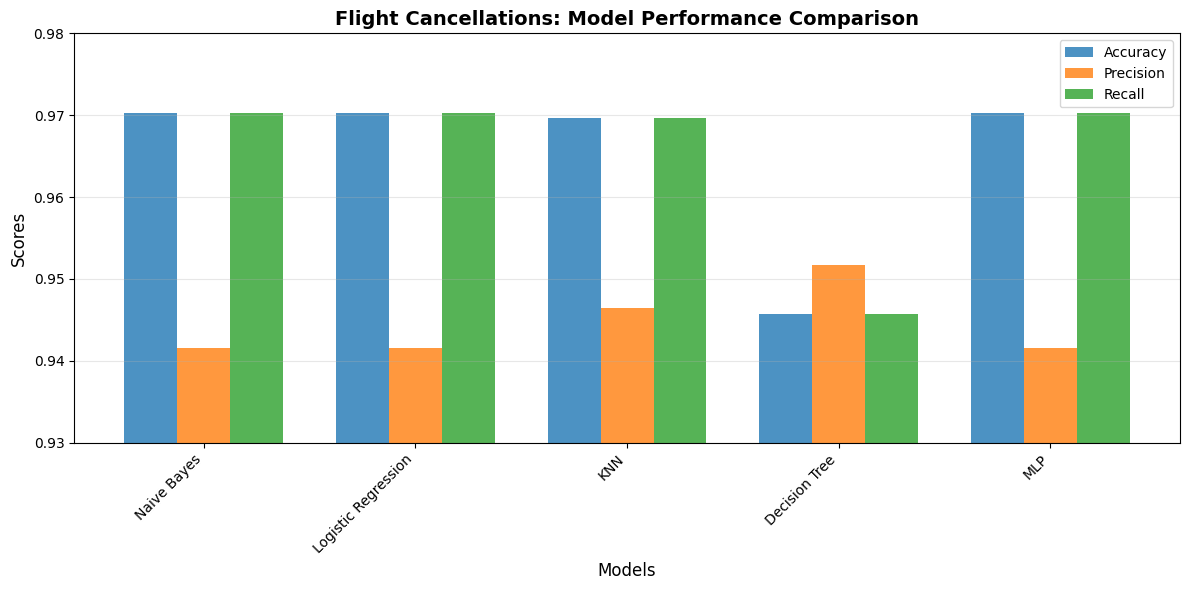

In [8]:
# Performance comparison for Flights dataset
models = list(flight_results.keys())
accuracy_scores = [flight_results[m]['accuracy'] for m in models]
precision_scores = [flight_results[m]['precision'] for m in models]
recall_scores = [flight_results[m]['recall'] for m in models]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width, accuracy_scores, width, label='Accuracy', alpha=0.8)
bars2 = ax.bar(x, precision_scores, width, label='Precision', alpha=0.8)
bars3 = ax.bar(x + width, recall_scores, width, label='Recall', alpha=0.8)

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Flight Cancellations: Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()
ax.set_ylim([0.93, 0.98])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('charts/flights_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

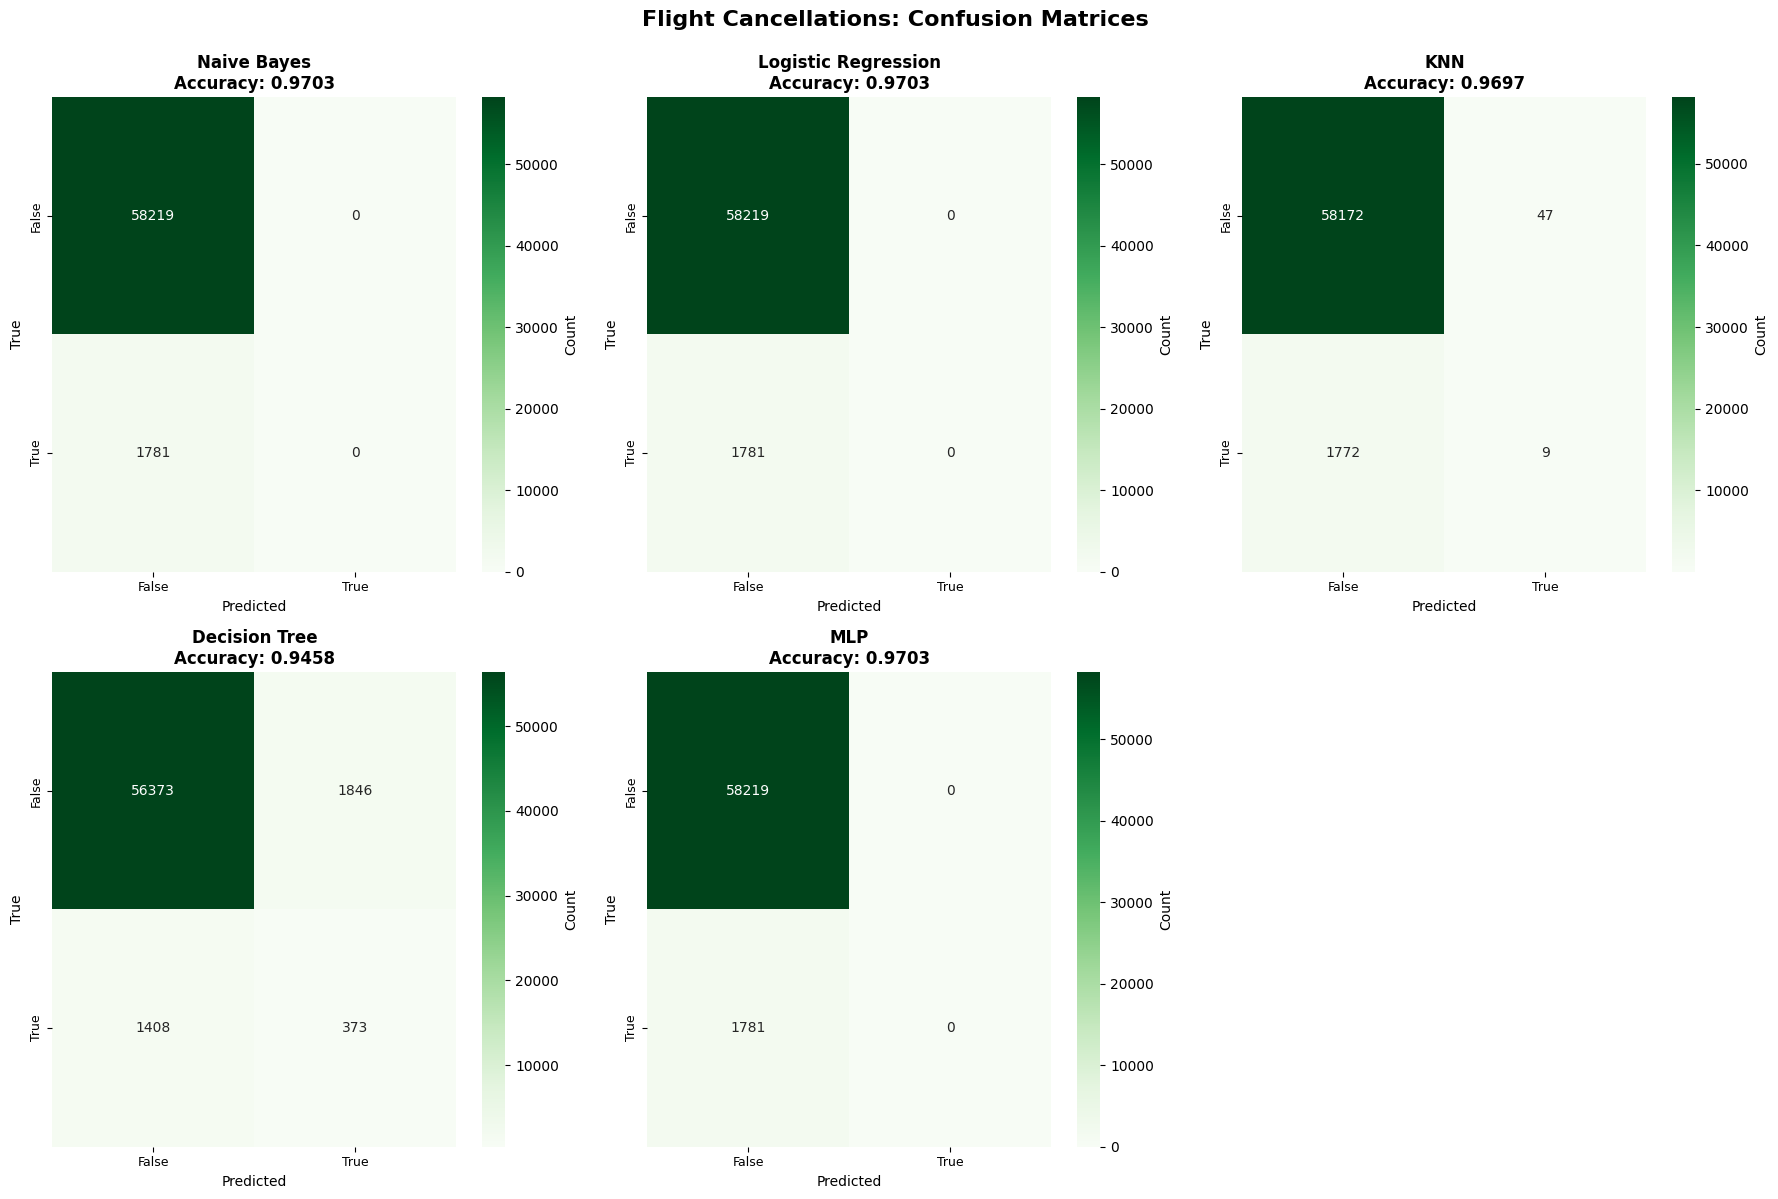

In [9]:
# Confusion Matrices for Flights dataset
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (model_name, results) in enumerate(flight_results.items()):
    cm = confusion_matrix(flight_target_test, results['predictions'])
    
    # Get unique class labels
    class_labels = sorted(flight_target_test.unique())
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[idx], 
                cbar_kws={'label': 'Count'},
                xticklabels=class_labels,
                yticklabels=class_labels)
    axes[idx].set_title(f'{model_name}\nAccuracy: {results["accuracy"]:.4f}', 
                        fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicted', fontsize=10)
    axes[idx].set_ylabel('True', fontsize=10)
    axes[idx].tick_params(labelsize=9)

# Hide the extra subplot
axes[5].axis('off')

plt.suptitle('Flight Cancellations: Confusion Matrices', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('charts/flights_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()